# Regresión Lineal Simple. Un ejemplo minimalista

### Importar las librerías relevantes

In [17]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Para graficar en 3-D

### Generar datos al azar para entrenar al modelo

Se trabajará con dos variables de entrada, las x1 y x2 en los ejemplos vistos en clase. Se generan al azar a partir de una distribución uniforme.

Se creará una matriz con estas dos variables.  La matriz X del modelo lineal y = x * w + b

In [18]:
# Por facilidad, se declara una variable para indicar el tamaño del conjunto 
#      de datos de entrenamiento. Puede probarse con 100,000 o 1,000,000 pero hay 
#      que tener cuidado ya que con tantas observaciones puede que la máquina se quede!

observaciones = 1000

x1 = np.random.uniform(low = -10, high = 10, size = (observaciones,1))
x2 = np.random.uniform(-10, 10, (observaciones,1))

X = np.column_stack((x1,x2))

# Verificar la forma de la matriz 
# Debiera ser n x k, donde n es el número de observaciones, y k es el número de variables.

print (X.shape)

(1000, 2)


### Generar las metas a las que debemos apuntar

Para el modelo se usará la función f(x1, x2) = 2 * x1 - 3 * x2 + 5 + <ruido pequeño>.  El ruido es para hacerlo más realista.

Se utiliza la metodología de ML, y al finalizar se determinará si el algoritmo la ha aprendido.  

Al utilizar esta función, se espera que la red neuronal genere los pesos w1 = 2, w2 = -3 y el sesgo b = 5.  Si no se logra, es que algo se ha hecho mal. 

In [19]:
ruido = np.random.uniform(-1, 1, (observaciones,1))

metas = 2 * x1 - 3 * x2 + 5 + ruido

# Verificar las dimensiones. Deben ser n x m, donde m es el número de variables de salida.
print (metas.shape)

(1000, 1)


### Graficar los datos a usar para el entrenamiento

La idea es ver que haya una fuerte tendencia que el modelo debe aprender a reproducir.


In [ ]:
print(x1.shape)
print(x2.shape)
print(metas.shape)

In [20]:
x1N = x1.reshape(observaciones,)
x2N = x2.reshape(observaciones,)
metasN = metas.reshape(observaciones,)

fig = px.scatter_3d(x = x1N, y = x2N, z = metasN)

fig.update_layout(
    width = 500,
    height = 500,)

fig.show()

### Inicializar variables

Se inicializan los pesos y sesgos, al azar, dentro de un rango inicial pequeño.  Es posible "jugar" con este valor pero no es recomendable ya que el uso de rangos iniciales altos inhibe el aprendizaje por parte del algoritmo

Los pesos son de dimensiones k x m, donde k es el numero de variables de entrada y m es el número de variables de salida.  

Como solo hay una salida, el sesgo es de tamaño 1, y es un escalar

In [21]:
rango_inicial = 0.1     #  valor máximo para los pesos y sesgos iniciales

pesos = np.random.uniform(low = -rango_inicial, high = rango_inicial, size = (2, 1))

sesgos = np.random.uniform(low = -rango_inicial, high = rango_inicial, size = 1)

#Ver cómo fueron inicializados.
print (pesos)
print (sesgos)

[[-0.08036491]
 [ 0.00928422]]
[-0.00386625]


In [ ]:
pesos.shape

### Asignar la tasa de aprendizaje (Eta)

Se asigna una tasa de aprendizaje pequeña.  Para este ejemplo funciona bien 0.02.  Vale la pena "jugar" con este valor para ver los resultados de hacerlo.

In [46]:
eta = 1

### Entrenar el modelo

Se utilizará un valor de 100 para iterar el modelo con el conjunto de datos de entrenamiento.  Ese valor funciona bastante bien con la tasa de aprendizaje de 0.02.  Cómo saber el número adecuado de iteraciones es algo que se verá en futuras sesiones, pero generalmente una tasa de aprendizaje baja requiere de más iteraciones que una más alta.  Sin embargo hay que tener en mente que una tasa de aprendizaje alta puede causar que la pérdida "Loss" diverja a infinito, en vez de converger a cero (0)

Puesto que esta es una regresión, se usará la función de pérdida L2-norm (dividido por 2, para ser consistente con la clase).  Es más, también se dividirá por el número de observaciones para obtener un promedio de pérdida por observación.  Se discutió en clase sobre la libertad de modificar esta función una vez no se pierda la característica de ser más baja para los resultados mejores, y vice versa.

Se mostrará la función de pérdida (loss) en cada iteración, para ver si está decreciendo como se desea.

Otro pequeño truco es escalar las deltas de la misma manera que se hizo con la función de pérdida.  De esta forma la tasa de aprendizaje es independiente del número de observaciones.  De nuevo esto no cambia el principio, solo hace más fácil la selección de una tasa única de aprendizaje. 

Finalmente se aplica la regla de actualización del decenso de gradiente.

Ojo!  los pesos son de dimensión 2 X 1, la tasa de aprendizaje es 1 X 1 (escalar), las entradas son 1000 X 2, y las deltas escaladas son 1000 X 1.  Es necesario obtener la transpuesta de las entradas para que no hayan problemas de dimensión en las operaciones. 



In [47]:
for i in range (100):
    
    # Esta es la ecuacion del modelo lineal: y = xw + b 
    y = np.dot(X, pesos) + sesgos
    
    # Las deltas son las diferencias entre las salidas y las metas (targets)
    # deltas es un vector 1000 x 1
    deltas = y - metas
        
    perdida = np.sum(deltas ** 2) / 2 / observaciones
    
    print(perdida)
    
    deltas_escaladas = deltas / observaciones
      
    pesos = pesos - eta * np.dot(X.T, deltas_escaladas)
    sesgos = sesgos - eta * np.sum(deltas_escaladas)
    
    # Los pesos son actualizados en forma de algebra lineal(una matriz menos otra)
    # Sin embargo, los sesgos en este caso son solo un número (solo se calcula una salida), 
    #       es necesario transformar las deltas a un escalar.      
    # Ambas líneas son consistentes con la metodología de decenso de gradiente

8.54809508713305
0.6838453916744726
509.15031528865416
495431.9566007067
482495016.07239234
470175829881.8197
458472175733286.06
4.473834682476942e+17
4.3691066805997516e+20
4.270563578698908e+23
4.178248264397277e+26
4.092221609658212e+29
4.012563484596649e+32
3.939373868278887e+35
3.872774063981283e+38
3.81290802700153e+41
3.75994381379059e+44
3.714075161902038e+47
3.6755232110434883e+50
3.6445383763665977e+53
3.6214023860529786e+56
3.6064304962492e+59
3.59997389748052e+62
3.6024223278373454e+65
3.614206909487113e+68
3.6358032264256005e+71
3.6677346628536574e+74
3.7105760231574807e+77
3.764957456191692e+80
3.8315687084266383e+83
3.9111637325345075e+86
4.004565680166452e+89
4.112672310027946e+92
4.236461844906436e+95
4.3769993140600625e+98
4.5354434203552244e+101
4.713053974763186e+104
4.9111999443104624e+107
5.131368163347176e+110
5.3751727620738604e+113
5.6443653706765576e+116
5.9408461621885934e+119
6.266675802355496e+122
6.624088380357763e+125
7.015505400280773e+128
7.443550919746

### Desplegar los pesos y el sesgo para ver si funcionaron correctamente.

Por el diseño de los datos, los pesos finales deben ser 2 y -3, y el sesgo: 5

**NOTA:**  Si aún no están los valores correctos, puede que aún estén convergiendo y sea necesario iterar más veces.  Para esto solo se requiere ejecutar la celda anterior cuantas veces sea requerido

In [48]:
print(pesos, sesgos)      

[[-4.96636458e+148]
 [-1.65915759e+148]] [2.13801574e+146]


### Graficar las últimas salidas vrs las metas (targets)

Como son los últimos valores, luego del entrenamiento, representan la exactitut del modelo final de.  Entre más cercana esté esta gráfica a una línea de 45 grados, más cercanas están las salidas y metas.

Como este ejemplo es pequeño, es posible hacerlo, en los problemas que se veran posteriormente en el curso, esto ya no sería posible.

In [49]:
yN = y.reshape(observaciones,)
metasN = metas.reshape(observaciones,)
fig = px.scatter(x = yN, y =  metasN)

fig.update_layout(
    width = 400,
    height = 400,)

fig.show()

# PREGUNTA 2

### ETA = 0.0001

1. El tiempo de ejecución fue de 9ms lo que representa un nivel de procesamiento más lento a comparacion de la utilizada en clase (eta = 0.02) la cual tuvo un tiempo de ejecución de 2ms, esto pasa debido a que los pesos cambian más lentamente en comparación con una tasa de aprendizaje más grande 

2. Los valores de pérdida iniciales rondaban por los 200, sin embargo cada vez que se ejecutaba el código para entrenar el modelo, se reducían las pérdidas drásticamente, llegando a valores máximos de 8 con 7 ejecuciones  

3. En el caso de los pesos, gracias a que la tasa de aprendizaje fue más pequeña los pesos cambian más lentamente y alcanzaron diferentes valores finales: [[2.00085742], [-2.99841668]]. En el caso del sesgo este se acopla de la misma manera que con la tasa de aprendizaje, teniendo un valor de [4.32521104]

4. Una tasa de aprendizaje más alta generalmente conduce a una convergencia más rápida pero puede ser propensa a oscilaciones o divergencias si es demasiado alta. Por otro lado, una tasa de aprendizaje más baja generalmente conduce a una convergencia más lenta pero puede ser más estable y menos propensa a oscilaciones.

5. Observando que los datos de pérdida disminuyen con cada ejecución y que el modelo converge, se puede inferir que el problema se soluciona, sin embargo hay que hacer diversas pruebas para verificar el modelo con diferentes variedades de escenarios y conjuntos de datos.

6. En la siguiente grafica se puede observar que la linea tiene una inclinación de 45 grados:

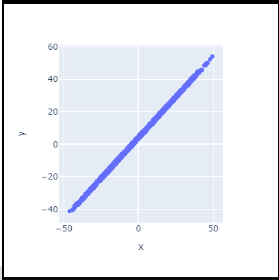

podemos concluir que el modelo está cumpliendo de manera excelente con la condición de ajustarse de manera precisa a las metas reales.



### ETA = 1

1. El tiempo de ejecución es relativamente constante, alrededor de 10 ms en cada iteración, lo que sugiere que el tiempo de ejecución no está aumentando significativamente a medida que avanza el proceso de entrenamiento.

2. La pérdida inicial disminuye rápidamente durante las primeras iteraciones, pero luego comienza a aumentar dramáticamente y alcanza valores extremadamente altos. Esto sugiere que el modelo inicialmente mejora, pero luego se desestabiliza y no logra converger a una solución aceptable.

3. Los valores de los pesos y los sesgos se vuelven extremadamente grandes ([[-4.96636458e+148] [-1.65915759e+148]], [2.13801574e+146]), lo que indica que el modelo está experimentando problemas de divergencia. Estos valores tan grandes pueden ser indicativos de desbordamiento numérico o problemas de estabilidad en el proceso de entrenamiento.

4. El número de iteraciones continúa aumentando, pero no parece haber una mejora significativa en el rendimiento del modelo. Esto sugiere que el proceso de entrenamiento no está convergiendo hacia una solución útil.

5. No, el problema no queda resuelto. De hecho, parece haber empeorado, ya que el modelo no logra minimizar la pérdida y los pesos y sesgos se vuelven extremadamente grandes, lo que indica problemas graves en el proceso de entrenamiento.

6. La última gráfica muestra una dispersión de datos, sin seguir una línea de 45 grados. Esto indica que las predicciones del modelo no se alinean bien con las metas reales, lo que sugiere un rendimiento deficiente del modelo. No se cumple con la condición de que la gráfica sea de 45 grados, lo que indica que las predicciones del modelo están muy alejadas de las metas reales.

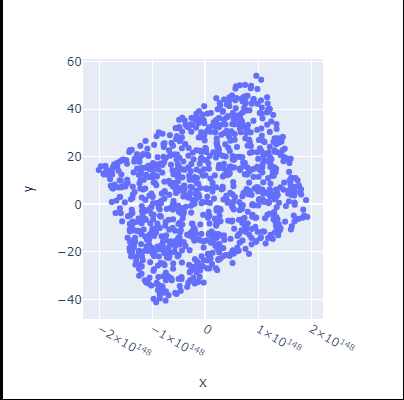


# Análisis de escalabilidad del modelo

## 10000 observaciones 


In [ ]:
observaciones = 100000

x1 = np.random.uniform(low = -10, high = 10, size = (observaciones,1))
x2 = np.random.uniform(-10, 10, (observaciones,1))

X = np.column_stack((x1,x2))

# Verificar la forma de la matriz 
# Debiera ser n x k, donde n es el número de observaciones, y k es el número de variables.

print (X.shape)

In [ ]:
ruido = np.random.uniform(-1, 1, (observaciones,1))

metas = 2 * x1 - 3 * x2 + 5 + ruido

# Verificar las dimensiones. Deben ser n x m, donde m es el número de variables de salida.
print (metas.shape)
print(x1.shape)
print(x2.shape)
print(metas.shape)

In [ ]:
x1N = x1.reshape(observaciones,)
x2N = x2.reshape(observaciones,)
metasN = metas.reshape(observaciones,)

fig = px.scatter_3d(x = x1N, y = x2N, z = metasN)

fig.update_layout(
    width = 500,
    height = 500,)

fig.show()